In [ ]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sns
import copy
%matplotlib inline
import matplotlib.pyplot as plt

# 1) Importing + Concatenating Data 

In [ ]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210703, 210710, 210717, 210731, 210807, 210814, 210821, 210828, 210904, 210911, 210918, 210925]
df_raw = get_data(week_nums)
df_raw

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646


In [ ]:
df_raw.DATE.value_counts().sort_index() # 12 weeks of data 3 months (From 3rd of July September to the 25th of September 2021)

06/26/2021    29965
06/27/2021    29840
06/28/2021    29814
06/29/2021    29843
06/30/2021    29883
              ...  
09/20/2021    30444
09/21/2021    30082
09/22/2021    30014
09/23/2021    30033
09/24/2021    29899
Name: DATE, Length: 84, dtype: int64

# 2) Converting date and time to datetime objects

In [ ]:
df_raw['DATE_TIME'] = pd.to_datetime(df_raw.DATE + ' ' + df_raw.TIME, format='%m/%d/%Y  %H:%M:%S')
df_raw

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645,2021-09-24 05:00:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645,2021-09-24 09:00:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645,2021-09-24 13:00:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646,2021-09-24 17:00:00


# 3) Remove leading or trailing spaces from column names

In [ ]:
df_raw.columns = [column.strip() for column in df_raw.columns]
df_raw.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

# 4) Dropping duplicate entries

In [ ]:
# https://www.roelpeters.be/solve-pandas-valueerror-cannot-reindex-from-a-duplicate-axis/
df_raw = df_raw.loc[~df_raw.index.duplicated(), :]
df_raw.index.is_unique

True

In [ ]:
df_raw

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,05:00:00,REGULAR,5554,645,2021-09-24 05:00:00
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,09:00:00,REGULAR,5554,645,2021-09-24 09:00:00
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,13:00:00,REGULAR,5554,645,2021-09-24 13:00:00
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/24/2021,17:00:00,REGULAR,5554,646,2021-09-24 17:00:00


# 5) Retrieving relevant columns for further handling

In [ ]:
df = df_raw.copy(deep=True)
df.drop(['C/A', 'UNIT', 'SCP', 'LINENAME', 'DIVISION', 'DESC'], axis=1, inplace= True)
df

,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00
...,...,...,...,...,...,...
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00
210398,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00


In [ ]:
df.STATION.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

# 6) Applying the difference function to get the daily **enteries**

In [ ]:
df[["PREV_DATE", "PREV_ENTRIES"]] = (df.groupby(["STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(-1)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00,06/26/2021,7592804.0
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00,06/26/2021,7592816.0
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00,06/26/2021,7592870.0
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00,06/26/2021,7592992.0
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00,06/26/2021,7593116.0
...,...,...,...,...,...,...,...,...
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,09/24/2021,5554.0
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,09/24/2021,5554.0
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,09/24/2021,5554.0
210398,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00,09/24/2021,5554.0


# 7) Removing **entries** values where the turnstiles reset + handling negative values

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        
        counter = -counter
    if counter > max_counter:
        
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        
        return 0
    return counter

df["DAILY_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=1000000)

6724221 1437718.0
1614068 38594.0
41349 6162127.0
6164286 7585410.0
7588015 12181932.0
12186539 9492813.0
9495848 524451.0
162678 9545228.0
4485686 5579471.0
6556733 3293174.0
3294934 79270.0
1156999 3681.0
748503 119789765.0
119792727 5188081.0
5190060 118530.0
5159484 15700322.0
15703143 11478566.0
11480642 3890096.0
4863684 2336630.0
2340554 19956980.0
19962947 4081164.0
4093989 495222.0
1121270 4372415.0
4379018 885595278.0
885593507 94608.0
5264555 6520506.0
6223533 1232.0
64068 6945726.0
6947411 1601975.0
35484 13113974.0
13116752 1172861.0
1175034 10599.0
12653 9157468.0
9159291 7568773.0
7570666 222607.0
224260 4087350.0
4089093 6019080.0
6021866 15435756.0
15440399 1357689.0
1358012 31399.0
10022558 4195158.0
4199650 2940537.0
2265331 3724162.0
28452552 16527256.0
16537141 67842241.0
67842741 5586445.0
5604058 14254542.0
15209948 9070582.0
8545880 130305.0
136207 2431146.0
2439256 80976.0
86132 15784633.0
15790201 566814.0
567820 1760283.0
3954333 690330.0
693432 2548786.0
317

In [ ]:
df

,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00,06/26/2021,7592804.0,12.0
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00,06/26/2021,7592816.0,12.0
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00,06/26/2021,7592870.0,54.0
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00,06/26/2021,7592992.0,122.0
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00,06/26/2021,7593116.0,124.0
...,...,...,...,...,...,...,...,...,...
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,09/24/2021,5554.0,0.0
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,09/24/2021,5554.0,0.0
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,09/24/2021,5554.0,0.0
210398,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00,09/24/2021,5554.0,0.0


# 8) Applying the difference function to get the daily **exits**

In [ ]:
df[["PREV_DATE", "PREV_EXITS"]] = (df.groupby(["STATION"])["DATE", "EXITS"].apply(lambda grp: grp.shift(-1)));
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,PREV_EXITS
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00,06/26/2021,7592804.0,12.0,2595713.0
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00,06/26/2021,7592816.0,12.0,2595729.0
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00,06/26/2021,7592870.0,54.0,2595762.0
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00,06/26/2021,7592992.0,122.0,2595791.0
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00,06/26/2021,7593116.0,124.0,2595809.0
...,...,...,...,...,...,...,...,...,...,...
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,09/24/2021,5554.0,0.0,645.0
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,09/24/2021,5554.0,0.0,645.0
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,09/24/2021,5554.0,0.0,646.0
210398,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00,09/24/2021,5554.0,0.0,646.0


# 9) Removing **exits** values where the turnstiles reset + handling negative values

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        
        counter = -counter
    if counter > max_counter:
        
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:

        return 0
    return counter


df["DAILY_EXITS"] = df.apply(get_daily_counts, axis=1, max_counter=1000000)

2597170 1531910.0
1532814 5430390.0
5435724 2513426.0
2519262 52722.0
56737 7019519.0
7022419 3920085.0
3921719 1469667.0
22376 4983391.0
7724311 3421829.0
3423990 16602240.0
16603303 1188908.0
1189639 30850.0
1112383 0.0
548008 3373531.0
3377796 2106801.0
2107919 34595.0
3077765 6255346.0
6258484 4648744.0
4650594 1928240.0
2366280 683925.0
685599 5548797.0
5551104 652464.0
1229166 3138191.0
3143902 489554461.0
489548477 100654.0
39003456 5980451.0
5980454 3381693.0
2742722 0.0
32274 3604615.0
2766869 51652322.0
51655484 4320742.0
4322163 248435.0
3413 3931951.0
3932588 9462937.0
9465132 613664.0
619309 5111716.0
5116674 2228428.0
2230167 4596501.0
4597987 523902.0
12585469 4918054.0
4924397 2870375.0
2873548 1371240.0
1372479 3820253.0
3823332 6466623.0
11978244 6674889.0
6682860 18952848.0
18955157 8940358.0
8944249 10715995.0
10729880 6120865.0
6125769 3843864.0
3846244 2167211.0
2169290 3246598.0
3250605 120549.0
126168 1421039.0
1430864 241636.0
260060 33264146.0
33282170 195666.

In [ ]:
df

,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,PREV_EXITS,DAILY_EXITS
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00,06/26/2021,7592804.0,12.0,2595713.0,7.0
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00,06/26/2021,7592816.0,12.0,2595729.0,16.0
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00,06/26/2021,7592870.0,54.0,2595762.0,33.0
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00,06/26/2021,7592992.0,122.0,2595791.0,29.0
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00,06/26/2021,7593116.0,124.0,2595809.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,09/24/2021,5554.0,0.0,645.0,0.0
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,09/24/2021,5554.0,0.0,645.0,0.0
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,09/24/2021,5554.0,0.0,646.0,1.0
210398,RIT-ROOSEVELT,09/24/2021,17:00:00,5554,646,2021-09-24 17:00:00,09/24/2021,5554.0,0.0,646.0,0.0


# 10) Dropping the last NaN row + unneeded columns (PREV_DATE, PREV_ENTRIES, PREV_EXITS)

In [ ]:
df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
df

,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,PREV_EXITS,DAILY_EXITS
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00,06/26/2021,7592804.0,12.0,2595713.0,7.0
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00,06/26/2021,7592816.0,12.0,2595729.0,16.0
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00,06/26/2021,7592870.0,54.0,2595762.0,33.0
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00,06/26/2021,7592992.0,122.0,2595791.0,29.0
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00,06/26/2021,7593116.0,124.0,2595809.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
210394,RIT-ROOSEVELT,09/24/2021,01:00:00,5554,645,2021-09-24 01:00:00,09/24/2021,5554.0,0.0,645.0,0.0
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,09/24/2021,5554.0,0.0,645.0,0.0
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,09/24/2021,5554.0,0.0,645.0,0.0
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,09/24/2021,5554.0,0.0,646.0,1.0


In [ ]:
df.drop(["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"],axis = 1 ,inplace = True)
df

,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAILY_ENTRIES,DAILY_EXITS
0,59 ST,06/26/2021,00:00:00,7592792,2595706,2021-06-26 00:00:00,12.0,7.0
1,59 ST,06/26/2021,04:00:00,7592804,2595713,2021-06-26 04:00:00,12.0,16.0
2,59 ST,06/26/2021,08:00:00,7592816,2595729,2021-06-26 08:00:00,54.0,33.0
3,59 ST,06/26/2021,12:00:00,7592870,2595762,2021-06-26 12:00:00,122.0,29.0
4,59 ST,06/26/2021,16:00:00,7592992,2595791,2021-06-26 16:00:00,124.0,18.0
...,...,...,...,...,...,...,...,...
210394,RIT-ROOSEVELT,09/24/2021,01:00:00,5554,645,2021-09-24 01:00:00,0.0,0.0
210395,RIT-ROOSEVELT,09/24/2021,05:00:00,5554,645,2021-09-24 05:00:00,0.0,0.0
210396,RIT-ROOSEVELT,09/24/2021,09:00:00,5554,645,2021-09-24 09:00:00,0.0,0.0
210397,RIT-ROOSEVELT,09/24/2021,13:00:00,5554,645,2021-09-24 13:00:00,0.0,1.0


# 11) Get total activity for passengers

In [ ]:
df["TOTAL_ACTIVITY"] = df["DAILY_ENTRIES"] + df["DAILY_EXITS"]

# 12) Deal with outliers in the dataset using boxplot approach

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


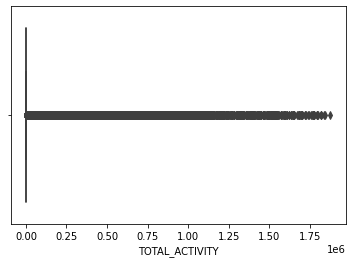

In [ ]:
sns.boxplot(df.TOTAL_ACTIVITY)

In [ ]:
q1 = np.quantile(df.TOTAL_ACTIVITY, 0.25)
q3 = np.quantile(df.TOTAL_ACTIVITY, 0.75)
IQR = q3 - q1
med = np.median(df.TOTAL_ACTIVITY)
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
print(upper_bound,lower_bound)
df = df[(df["TOTAL_ACTIVITY"] < upper_bound) & (df["TOTAL_ACTIVITY"] > lower_bound)]
df.TOTAL_ACTIVITY.max()

472.5 -259.5


472.0

# 13) Display total activity for 3 top stations

In [ ]:
df_grouped = (df
                        .groupby(["STATION"],as_index=False)
                        .TOTAL_ACTIVITY.sum()).sort_values(by = 'TOTAL_ACTIVITY', ascending = False).head(3)

df_grouped

,STATION,TOTAL_ACTIVITY
61,34 ST-PENN STA,562559.0
46,23 ST,373329.0
226,FULTON ST,344894.0


# 14) Display total activity for each station per date + time

In [ ]:
df_grouped_dt = (df
                        .groupby(["STATION","TIME"],as_index=False)
                        .TOTAL_ACTIVITY.sum())#.sort_values(by = 'TOTAL_ACTIVITY', ascending = False)
df_grouped_dt.head(10)

,STATION,TIME,TOTAL_ACTIVITY
0,1 AV,00:00:00,6596.0
1,1 AV,04:00:00,12604.0
2,1 AV,08:00:00,19853.0
3,1 AV,12:00:00,24836.0
4,1 AV,16:00:00,28901.0
5,1 AV,20:00:00,18571.0
6,103 ST,01:00:00,2149.0
7,103 ST,05:00:00,21983.0
8,103 ST,09:00:00,24828.0
9,103 ST,13:00:00,21066.0
